In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import missingno as msno
import seaborn as sns

In [2]:
# Datos de mediciones de fin de semana
weekend_data = pd.read_csv('../data/weekends.csv',index_col=0,parse_dates=True)
weekend_data = weekend_data.resample("600S").interpolate(method='time')
#weekend_data

In [3]:
# Nombres de e+ siempre los mismos
nombres = np.genfromtxt('../idf/cubiculo_original/DosPersonas/c001/c001.csv',
                        dtype='U',delimiter=',',max_rows=1,)
nombres

for i,nombre in enumerate(nombres):
    print(i,nombre)

0 Date/Time
1 THERMAL ZONE: JORGE:Zone Mean Air Temperature [C](TimeStep)
2 JORGE:Zone Thermal Comfort Fanger Model PMV [](TimeStep)
3 JORGE:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)


In [4]:
# funcion para importar datos de e+
def importa(file,caso):
    nombres = ['tiempo',f'Ti_{caso}',f'PMV_{caso}',f'PPD_{caso}']
    simulate = pd.read_csv(file,names=nombres,skiprows=1)
    simulate.tiempo = simulate.tiempo.str.replace('24:00:00','23:59:59')
    simulate.tiempo = '2019-'+simulate.tiempo
    simulate.tiempo = pd.to_datetime(simulate.tiempo,format='%Y- %m/%d %H:%M:%S')
    simulate.tiempo = simulate.tiempo-pd.Timedelta('10minute')
    simulate.set_index('tiempo',inplace=True)
    # Hago columna de dias para hacer mascara (opcional)
    #simulate['dia'] = simulate.index.day_of_week
    # solo dines de semana de simulaciones
    weekend_simu = simulate[simulate.index.day_of_week>=5]
    weekend_simu.drop([f'PMV_{caso}',f'PPD_{caso}'],axis='columns',inplace=True)
    # solo entre semana
    weekday_simu = simulate[simulate.index.day_of_week<5]
    weekday_simu.drop([f'Ti_{caso}'],axis='columns',inplace=True)
    return weekend_simu,weekday_simu

In [5]:
# simulaciones
c0001we,c0001wd = importa('../idf/cubiculo_original/DosPersonas/c0001/c0001.csv','0001')
c001we,c001wd   = importa('../idf/cubiculo_original/DosPersonas/c001/c001.csv','001')
c01we,c01wd     = importa('../idf/cubiculo_original/DosPersonas/c01/c01.csv','01')
c003we,c003wd   = importa('../idf/cubiculo_original/DosPersonas/c003/c003.csv','003')
# Estrategia Bioclimatica
c0001web,c0001wdb = importa('../idf/cubiculo_original/DosPersonas/EB/c0001/c0001EB.csv','0001EB')
c001web,c001wdb   = importa('../idf/cubiculo_original/DosPersonas/EB/c001/c001EB.csv','001EB')
c01web,c01wdb     = importa('../idf/cubiculo_original/DosPersonas/EB/c01/c01EB.csv','01EB')
c003web,c003wdb   = importa('../idf/cubiculo_original/DosPersonas/EB/c003/c003EB.csv','003EB')

D:\5116_MIS_COSAS\LIER_UNAM\winpython\WPy64-3940\python-3.9.4.amd64\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
data = pd.concat([weekend_data,c0001we,c001we,c01we,c003we],axis=1)
#data
comfort = pd.concat([c0001wd,c001wd,c01wd,c003wd],axis=1)
eb = pd.concat([c0001wdb,c001wdb,c01wdb,c003wdb],axis=1)

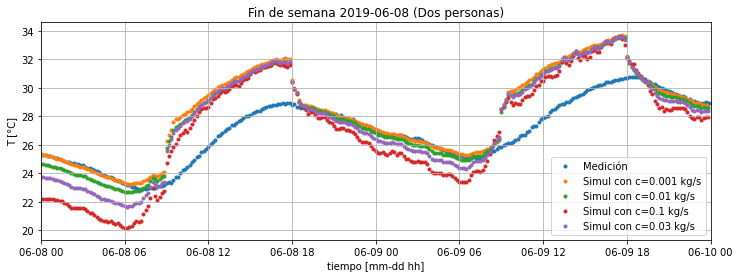

In [7]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-08')
fecha2 = fecha1 + pd.Timedelta('2D')

ax.set_xlim(fecha1,fecha2)
ax.scatter(data.index,data.TCAire,marker='.',label='Medición')
ax.scatter(data.index,data.Ti_0001,marker='.',label='Simul con c=0.001 kg/s')
ax.scatter(data.index,data.Ti_001,marker='.',label='Simul con c=0.01 kg/s')
ax.scatter(data.index,data.Ti_01,marker='.',label='Simul con c=0.1 kg/s')
ax.scatter(data.index,data.Ti_003,marker='.',label='Simul con c=0.03 kg/s')
ax.set_title('Fin de semana 2019-06-08 (Dos personas)')
ax.set_xlabel('tiempo [mm-dd hh]')
ax.set_ylabel('T [°C]')
ax.legend()
ax.grid()

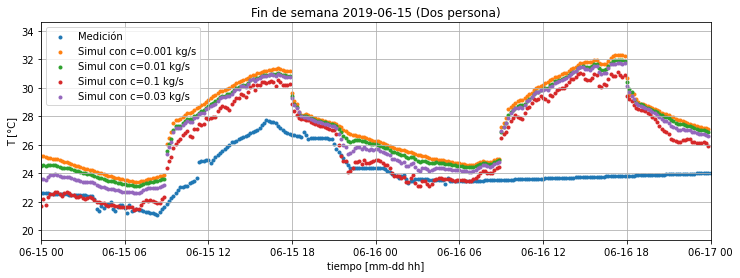

In [8]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-15')
fecha2 = fecha1 + pd.Timedelta('2D')

ax.set_xlim(fecha1,fecha2)
ax.scatter(data.index,data.TCAire,marker='.',label='Medición')
ax.scatter(data.index,data.Ti_0001,marker='.',label='Simul con c=0.001 kg/s')
ax.scatter(data.index,data.Ti_001,marker='.',label='Simul con c=0.01 kg/s')
ax.scatter(data.index,data.Ti_01,marker='.',label='Simul con c=0.1 kg/s')
ax.scatter(data.index,data.Ti_003,marker='.',label='Simul con c=0.03 kg/s')
ax.set_title('Fin de semana 2019-06-15 (Dos persona)')
ax.set_xlabel('tiempo [mm-dd hh]')
ax.set_ylabel('T [°C]')
ax.legend()
ax.grid()
fig.savefig('../figs/FinSemana0615_dos.png',dpi=100,bbox_inches=None)

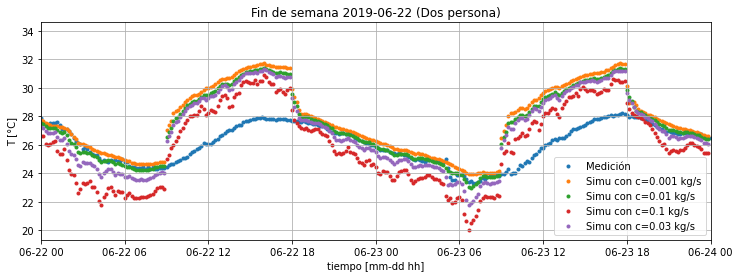

In [9]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-22')
fecha2 = fecha1 + pd.Timedelta('2D')

ax.set_xlim(fecha1,fecha2)
ax.scatter(data.index,data.TCAire,marker='.',label='Medición')
ax.scatter(data.index,data.Ti_0001,marker='.',label='Simu con c=0.001 kg/s')
ax.scatter(data.index,data.Ti_001,marker='.',label='Simu con c=0.01 kg/s')
ax.scatter(data.index,data.Ti_01,marker='.',label='Simu con c=0.1 kg/s')
ax.scatter(data.index,data.Ti_003,marker='.',label='Simu con c=0.03 kg/s')
ax.set_title('Fin de semana 2019-06-22 (Dos persona)')
ax.set_xlabel('tiempo [mm-dd hh]')
ax.set_ylabel('T [°C]')
ax.legend()
ax.grid()
fig.savefig('../figs/FinSemana0622_dos.png',dpi=100,bbox_inches=None)

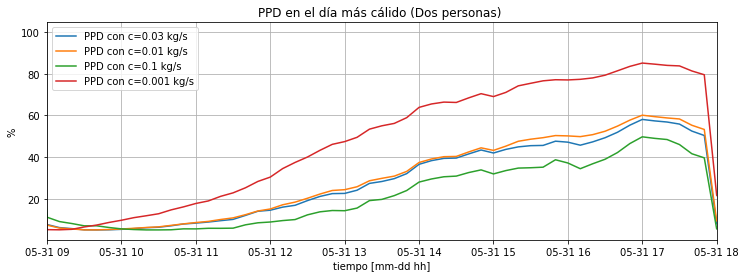

In [10]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-05-31 09:00:00')
fecha2 = fecha1 + pd.Timedelta('9H')

ax.set_xlim(fecha1,fecha2)
#ax.set_ylim(fecha1,fecha2)
ax.plot(comfort.index,comfort.PPD_003,label='PPD con c=0.03 kg/s')
ax.plot(comfort.index,comfort.PPD_001,label='PPD con c=0.01 kg/s')
ax.plot(comfort.index,comfort.PPD_01,label='PPD con c=0.1 kg/s')
ax.plot(comfort.index,comfort.PPD_0001,label='PPD con c=0.001 kg/s')
ax.set_title('PPD en el día más cálido (Dos personas) ')
ax.set_xlabel('tiempo [mm-dd hh]')
ax.set_ylabel('%')
ax.legend()
ax.grid()
fig.savefig('../figs/PPD_dos.png',dpi=100,bbox_inches=None)

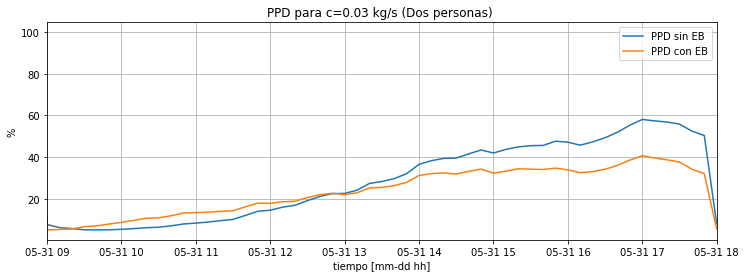

In [11]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-05-31 09:00:00')
fecha2 = fecha1 + pd.Timedelta('9H')

ax.set_xlim(fecha1,fecha2)
#ax.set_ylim(fecha1,fecha2)
ax.plot(comfort.index,comfort.PPD_003,label='PPD sin EB')
ax.plot(eb.index,eb.PPD_003EB,label='PPD con EB')
ax.set_title('PPD para c=0.03 kg/s (Dos personas) ')
ax.set_xlabel('tiempo [mm-dd hh]')
ax.set_ylabel('%')
ax.legend()
ax.grid()
fig.savefig('../figs/PPD003_dos.png',dpi=100,bbox_inches=None)

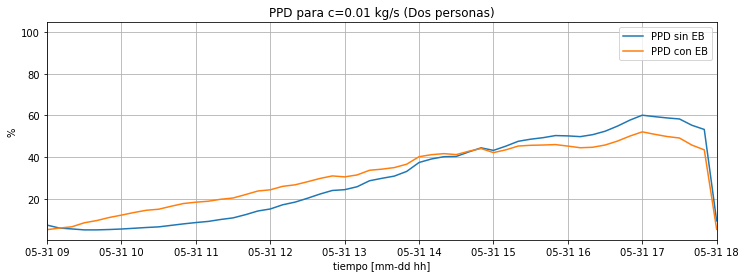

In [12]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-05-31 09:00:00')
fecha2 = fecha1 + pd.Timedelta('9H')

ax.set_xlim(fecha1,fecha2)
#ax.set_ylim(fecha1,fecha2)
ax.plot(comfort.index,comfort.PPD_001,label='PPD sin EB')
ax.plot(eb.index,eb.PPD_001EB,label='PPD con EB')
ax.set_title('PPD para c=0.01 kg/s (Dos personas)')
ax.set_xlabel('tiempo [mm-dd hh]')
ax.set_ylabel('%')
ax.legend()
ax.grid()
fig.savefig('../figs/PPD001_dos.png',dpi=100,bbox_inches=None)

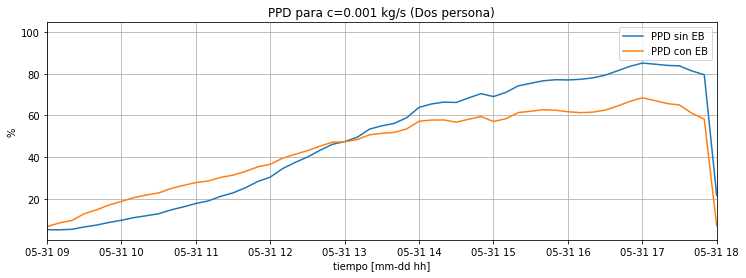

In [13]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-05-31 09:00:00')
fecha2 = fecha1 + pd.Timedelta('9H')

ax.set_xlim(fecha1,fecha2)
#ax.set_ylim(fecha1,fecha2)
ax.plot(comfort.index,comfort.PPD_0001,label='PPD sin EB')
ax.plot(eb.index,eb.PPD_0001EB,label='PPD con EB')
ax.set_title('PPD para c=0.001 kg/s (Dos persona)')
ax.set_xlabel('tiempo [mm-dd hh]')
ax.set_ylabel('%')
ax.legend()
ax.grid()
fig.savefig('../figs/PPD0001_dos.png',dpi=100,bbox_inches=None)

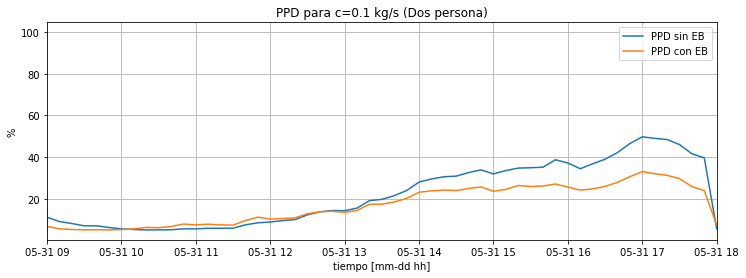

In [14]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-05-31 09:00:00')
fecha2 = fecha1 + pd.Timedelta('9H')

ax.set_xlim(fecha1,fecha2)
#ax.set_ylim(fecha1,fecha2)
ax.plot(comfort.index,comfort.PPD_01,label='PPD sin EB')
ax.plot(eb.index,eb.PPD_01EB,label='PPD con EB')
ax.set_title('PPD para c=0.1 kg/s (Dos persona)')
ax.set_xlabel('tiempo [mm-dd hh]')
ax.set_ylabel('%')
ax.legend()
ax.grid()
fig.savefig('../figs/PPD01_dos.png',dpi=100,bbox_inches=None)

In [15]:
# Limpio dataframes para metricas
junio_dos_Ti = data.truncate(before='2019-06-08 00:00:00',after='2019-06-23 23:49:00')
junio_dos_Ti.dropna(inplace=True)
#junio_una_Ti

In [16]:
#msno.matrix(junio_dos)

In [17]:
junio_dos_Ti.isnull().sum().sum()

0

In [18]:
junio_dos_Ti.to_csv('../data/junio_dos_Ti.csv')
comfort.to_csv('../data/comfort_dos.csv')